In [96]:
# Imort necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [97]:
# Load the dataset
df=pd.read_csv("owid-covid-data.csv")
print("Dataset loaded successfully!")
print("dataset shape:", df.shape)

Dataset loaded successfully!
dataset shape: (44785, 41)


In [98]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [99]:
# Set the style for seaborn and matplotlib
sns.set_theme(style="whitegrid")
plt.style.use("fivethirtyeight")

In [100]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44785 entries, 0 to 44784
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         44521 non-null  object 
 1   continent                        44257 non-null  object 
 2   location                         44785 non-null  object 
 3   date                             44785 non-null  object 
 4   total_cases                      44182 non-null  float64
 5   new_cases                        43982 non-null  float64
 6   new_cases_smoothed               43200 non-null  float64
 7   total_deaths                     44182 non-null  float64
 8   new_deaths                       43982 non-null  float64
 9   new_deaths_smoothed              43200 non-null  float64
 10  total_cases_per_million          43918 non-null  float64
 11  new_cases_per_million            43918 non-null  float64
 12  new_cases_smoothed

In [101]:
# Check for missing values in the DataFrame
df.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
total_cases                          603
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units     

In [102]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[df['date'].notnull()].copy()

In [103]:
# Fill missing values in numeric columns with 0
# It ensures that calculations like mean, sum, etc., do not fail due to NaN
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

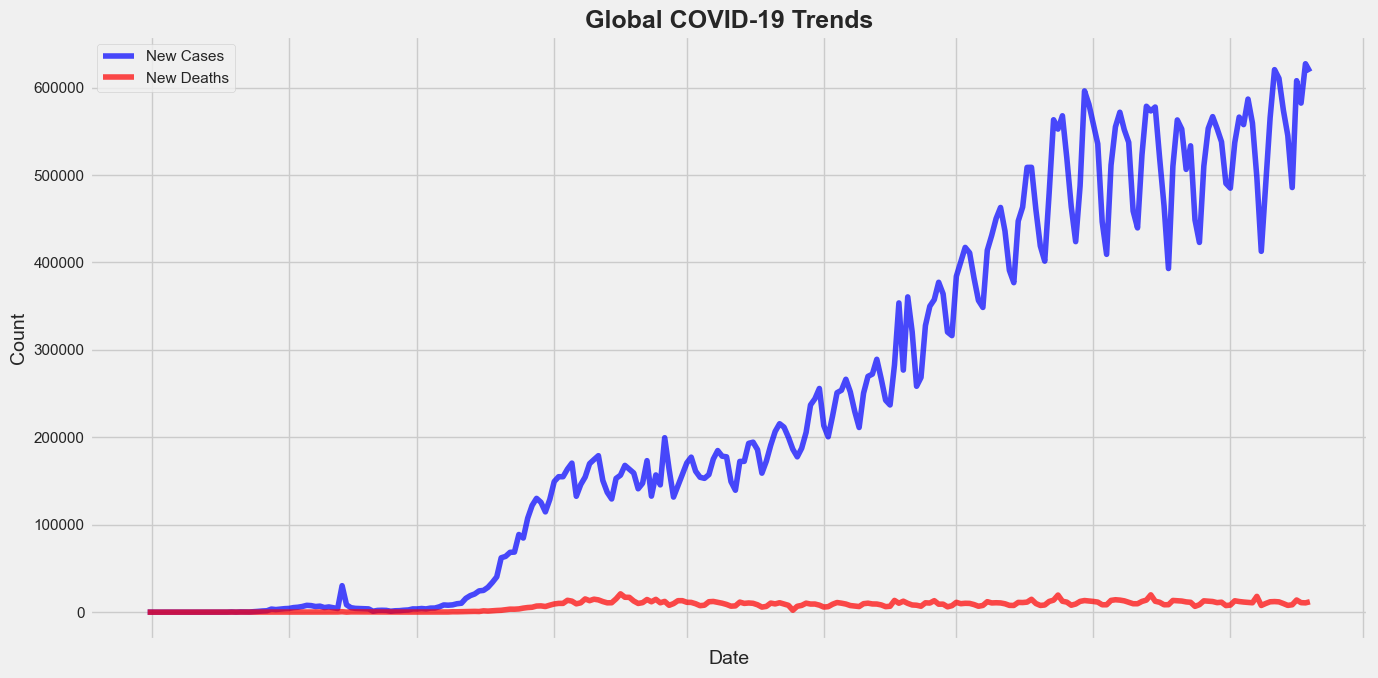

In [104]:
global_trend= df.groupby('date')[['new_cases','new_deaths']].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(global_trend['date'], global_trend['new_cases'], label='New Cases', color='blue',alpha=0.7)
plt.plot(global_trend['date'], global_trend['new_deaths'], label='New Deaths', color='red', alpha=0.7)
plt.title('Global COVID-19 Trends', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.gca().set_xticklabels([]) # Removes x-axis date labels  
plt.tight_layout()
plt.savefig('global_covid_trends.png', dpi=100)
plt.show()

In [105]:
# Drop rows where 'continent' or 'location' is missing
# This ensures that we only keep rows with valid geographical information
# It is important for analysis that requires these columns to be non-null
df = df[df['continent'].notnull() & df['location'].notnull()].copy()


## India's COVID-19 Cases and Deaths Over Time

This chart shows the progression of total COVID-19 cases and deaths in India over time. It helps visualize the trends and major waves of the pandemic in the country.

In [106]:
# Filter the DataFrame for India
# This creates a new DataFrame that only contains data for India
india_df = df[df['location'] == 'India'].copy()

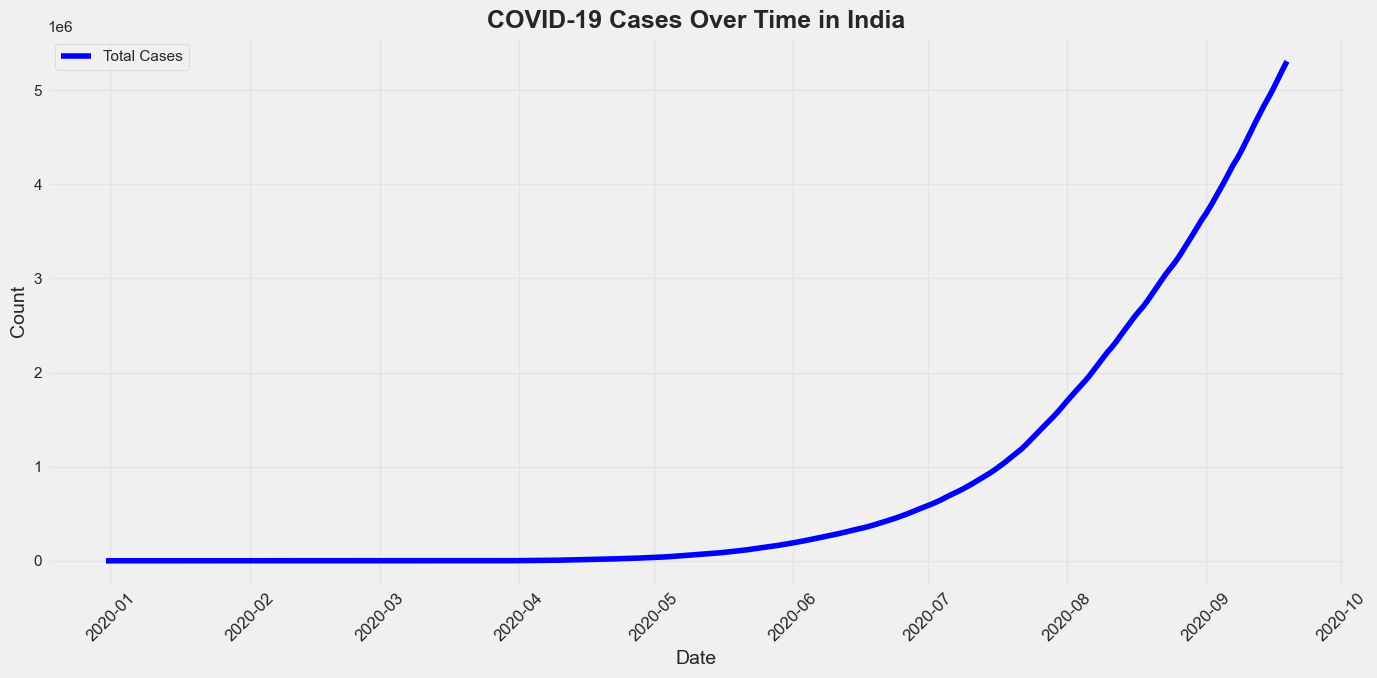

In [107]:
# Plotting COVID-19 Cases and Deaths in India
# This section visualizes the total cases and deaths in India over time
# 1. India's COVID-19 Cases and Deaths Over Time
plt.figure(figsize=(14, 7))
plt.plot(india_df['date'],india_df['total_cases'], label='Total Cases', color='blue')
plt.title('COVID-19 Cases Over Time in India', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig('covid_india_cases_.png', dpi=300)
plt.show()


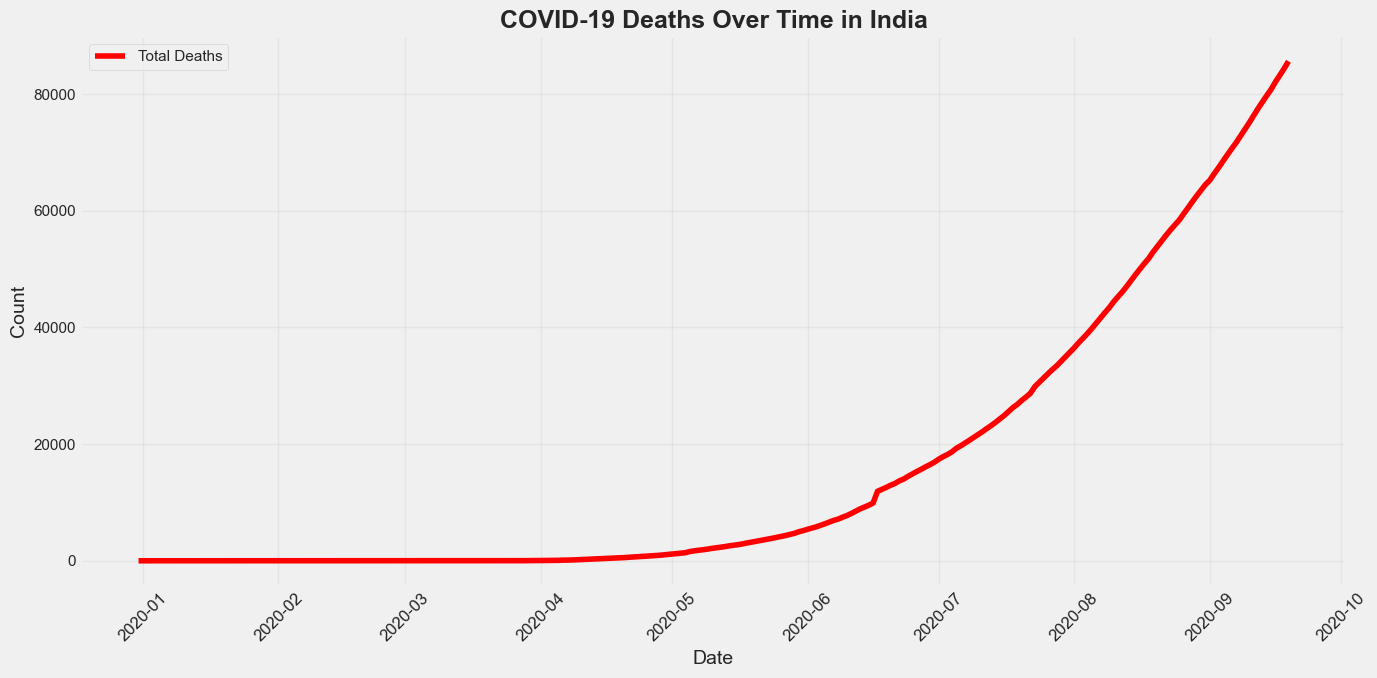

In [108]:
# Plotting COVID-19 Cases and Deaths in India
# This section visualizes the total cases and deaths in India over time
# 1. India's COVID-19 Cases and Deaths Over Time
plt.figure(figsize=(14, 7))
plt.plot(india_df['date'],india_df['total_deaths'], label='Total Deaths', color='red')
plt.title('COVID-19 Deaths Over Time in India', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.grid(True,alpha=0.3)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig('covid_india_deaths.png', dpi=300)
plt.show()


## Top-10 Countries by Total Covid-19 Deaths


In [109]:

# This section extracts the latest total  deaths for each location
# It groups the DataFrame by 'location' and finds the maximum 'total_deaths'
# This is useful for understanding the most recent impact of COVID-19 in different regions
latest_deaths = df.groupby('location')['total_deaths'].max().reset_index()


In [110]:
# Sort the latest deaths DataFrame to find the top 10 locations with the highest total deaths
top_10_deaths = latest_deaths.sort_values(by='total_deaths', ascending=False).head(10)
top_10_deaths

,location,total_deaths
199,United States,198589.0
27,Brazil,135793.0
90,India,85619.0
125,Mexico,72803.0
198,United Kingdom,41732.0
97,Italy,35668.0
150,Peru,31283.0
68,France,31249.0
177,Spain,30495.0
92,Iran,23952.0


C:\Users\Dev saxena\AppData\Local\Temp\ipykernel_13652\3856262281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='total_deaths', x='location', data=top_10_deaths, palette='viridis')


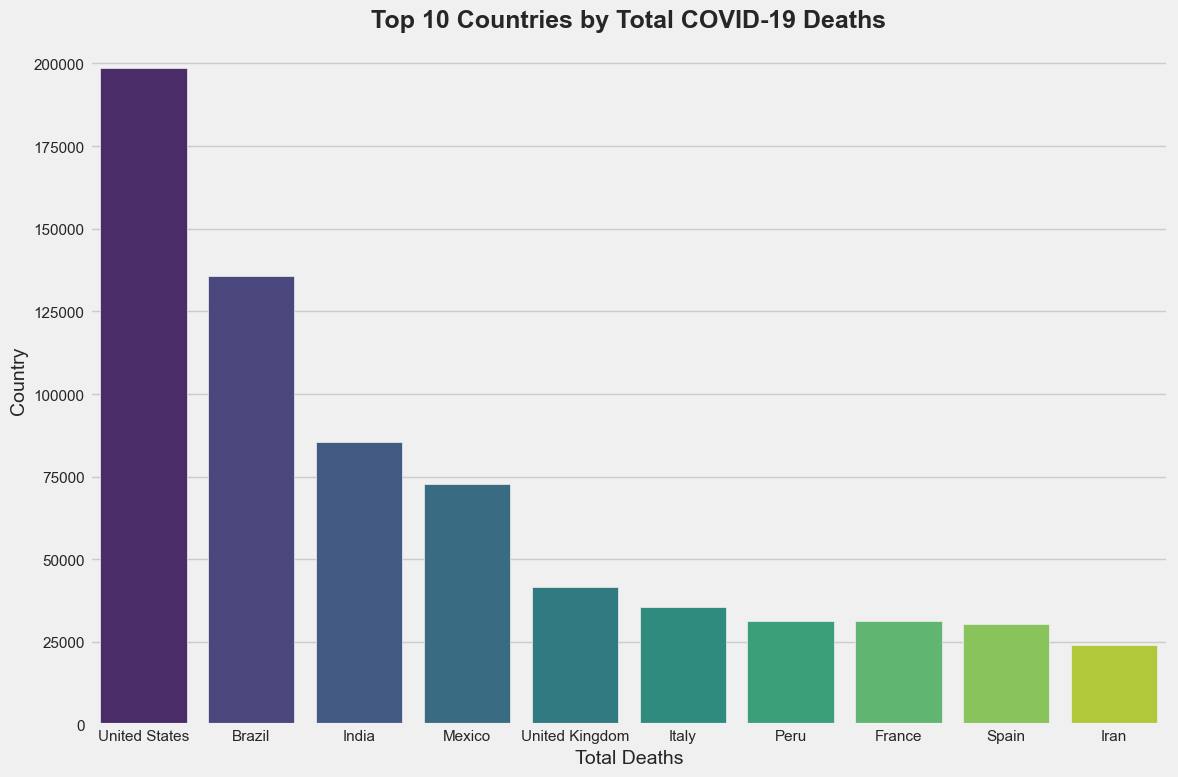

In [111]:
# 2. Top 10 Countries by Total COVID-19 Deaths
# This section visualizes the top 10 countries with the highest total deaths due to COVID-19
plt.figure(figsize=(12, 8))
sns.barplot(y='total_deaths', x='location', data=top_10_deaths, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Deaths', fontsize=18, fontweight='bold')
plt.xlabel('Total Deaths', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.savefig('covid_top10_deaths.png', dpi=300)
plt.show()

## GDP Per Capita vs Total Deaths Per Million

This scatter plot visualizes the relationship between GDP per capita and total COVID-19 deaths per million, colored by continent.

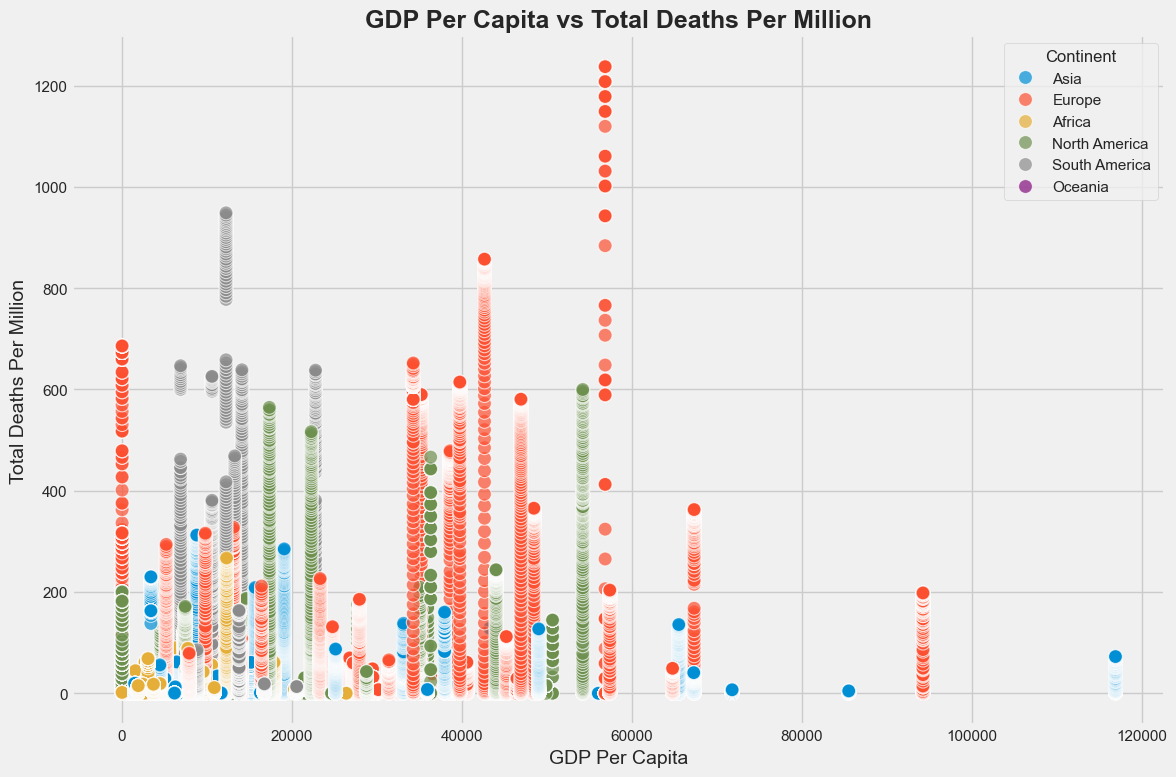

In [112]:
# 3. GDP Per Capita vs Total Deaths Per Million (Scatter)
# This section visualizes the relationship between GDP per capita and total deaths per million
# It helps to understand how economic factors might relate to the impact of COVID-19

plt.figure(figsize=(12, 8))
sns.scatterplot(x='gdp_per_capita', y='total_deaths_per_million', data=df, hue='continent', s=100, alpha=0.7)
plt.title('GDP Per Capita vs Total Deaths Per Million', fontsize=18, fontweight='bold')
plt.xlabel('GDP Per Capita', fontsize=14)
plt.ylabel('Total Deaths Per Million', fontsize=14)
plt.legend(title='Continent')
plt.tight_layout()
plt.savefig('covid_gdp_vs_deaths.png', dpi=300)
plt.show()

## Life Expectancy by Continent 
 This boxplot visualizes the distribution of life expectancy by continent

C:\Users\Dev saxena\AppData\Local\Temp\ipykernel_13652\3807810478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='continent', y='life_expectancy', data=df, palette='Set2')


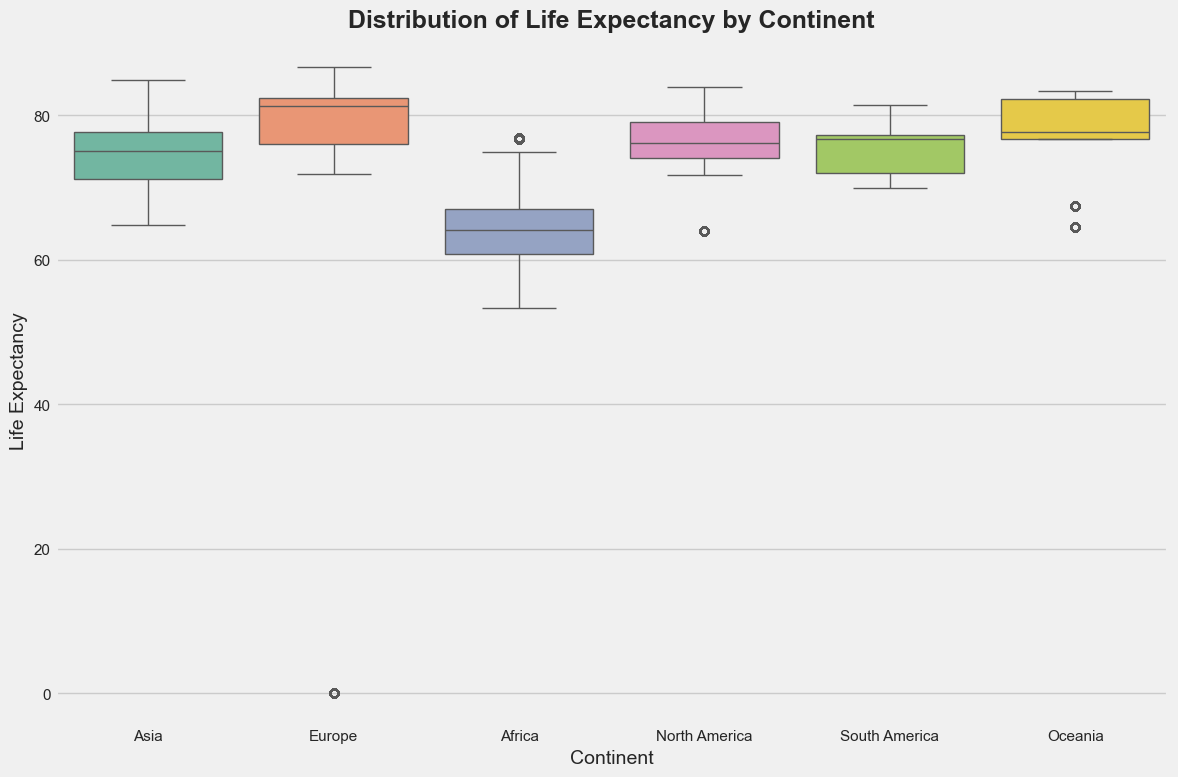

In [113]:
# 4. Life Expectancy by Continent (Boxplot)
# This section visualizes the distribution of life expectancy across different continents
# It helps to understand how life expectancy varies geographically
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='life_expectancy', data=df, palette='Set2')
plt.title('Distribution of Life Expectancy by Continent', fontsize=18, fontweight='bold')
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Life Expectancy', fontsize=14)
plt.tight_layout()
plt.savefig('covid_life_expectancy_continent.png', dpi=300)
plt.show()

Correlations between different numeric columns

In [114]:
# Correlation Analysis
# This section analyzes the correlation between various factors related to COVID-19
# It helps to identify relationships between total cases, deaths, GDP, life expectancy, and human development index
# Define the columns to analyze
cols = ['total_cases_per_million', 'total_deaths_per_million', 'gdp_per_capita', 'life_expectancy', 'human_development_index']
cols_corr = df[cols].corr()
cols_corr

,total_cases_per_million,total_deaths_per_million,gdp_per_capita,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.570575,0.298958,0.134820,0.007045
total_deaths_per_million,0.570575,1.000000,0.220998,0.122022,0.030981
gdp_per_capita,0.298958,0.220998,1.000000,0.429085,0.489103
life_expectancy,0.134820,0.122022,0.429085,1.000000,0.352692
human_development_index,0.007045,0.030981,0.489103,0.352692,1.000000


## Correlation Matrix Heatmap

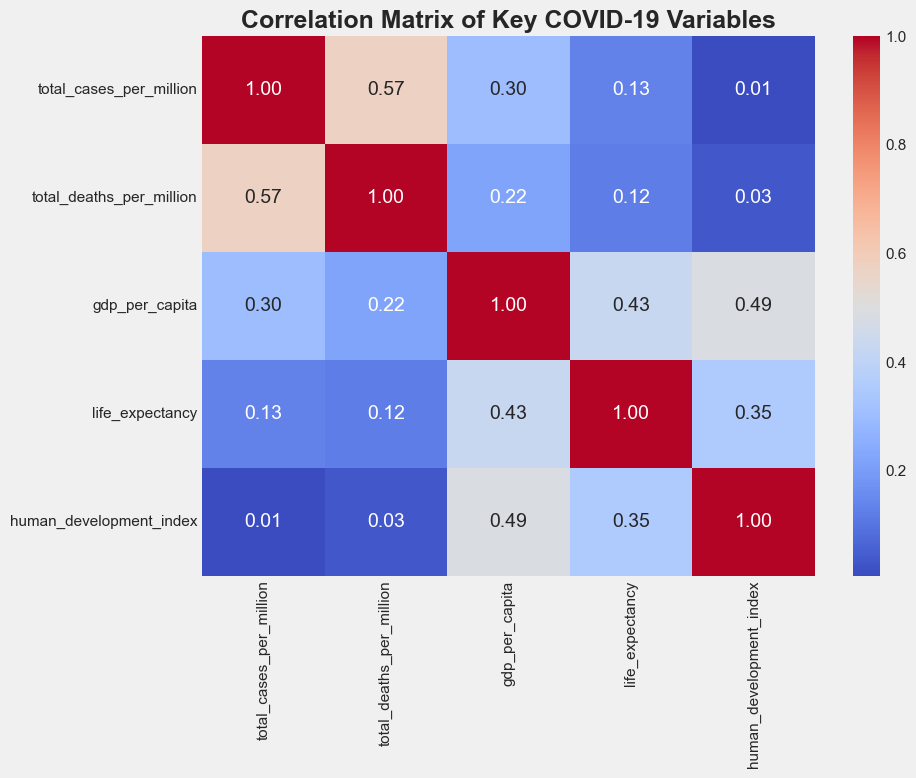

In [115]:
# 5. Correlation Matrix Heatmap
# This section visualizes the correlation matrix of key COVID-19 variables
# It helps to understand the relationships between different factors
plt.figure(figsize=(10, 8))
sns.heatmap(cols_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key COVID-19 Variables', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('covid_correlation_matrix.png', dpi=300)
plt.show()


## Covid-19 Worldwide Trends With Time

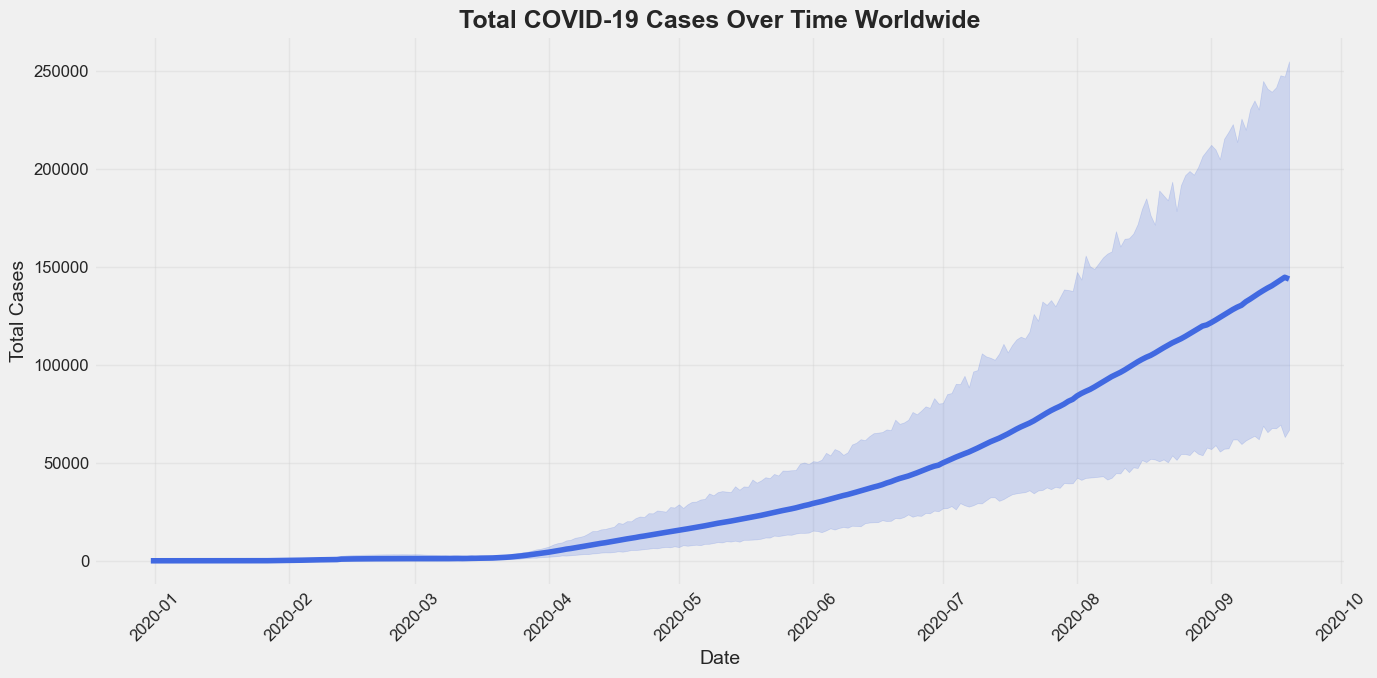

In [116]:
# 6. Worldwide COVID-19 Cases Over Time (Lineplot)
# This section visualizes the total COVID-19 cases worldwide over time
# It helps to understand the global trend of the pandemic
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='date', y='total_cases', color='royalblue')
plt.title('Total COVID-19 Cases Over Time Worldwide', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('covid_cases.png', dpi=300)
plt.show()

In [117]:
# Save the cleaned DataFrame to a new CSV file
# This is useful for further analysis or sharing the cleaned data
df.to_csv('cleaned_covid_data.csv', index=False)